In [1]:
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

!pip install kmodes
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')
%matplotlib inline
sns.set()

# Employee

In [2]:
df_employee = pd.read_excel("data/EmployeeRecords.xlsx")
df_employee

,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate
0,Bramar,Mat,1981-12-19,Tethys,Male,Tethys,BirthNation,1981-12-19,Tethys,2007-12-12,2017-12-11,Administration,Assistant to CEO,2005-07-01,Mat.Bramar@gastech.com.kronos,NaN,NaN,NaT
1,Ribera,Anda,1975-11-17,Tethys,Female,Tethys,BirthNation,1975-11-17,Tethys,2009-06-15,2019-06-14,Administration,Assistant to CFO,2009-10-30,Anda.Ribera@gastech.com.kronos,NaN,NaN,NaT
2,Pantanal,Rachel,1984-08-22,Tethys,Female,Tethys,BirthNation,1984-08-22,Tethys,2013-06-13,2023-06-12,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT
3,Lagos,Linda,1980-01-26,Tethys,Female,Tethys,BirthNation,1980-01-26,Tethys,2009-11-01,2019-10-31,Administration,Assistant to COO,2010-02-01,Linda.Lagos@gastech.com.kronos,NaN,NaN,NaT
4,Mies Haber,Ruscella,1964-04-26,Kronos,Female,Kronos,BirthNation,1964-04-26,NaN,NaT,NaT,Administration,Assistant to Engineering Group Manager,2003-04-02,Ruscella.Mies.Haber@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,1984-10-01
5,Forluniau,Carla,1981-06-02,Kronos,Female,Kronos,BirthNation,1981-06-02,NaN,NaT,NaT,Administration,Assistant to IT Group Manager,2005-03-07,Carla.Forluniau@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2001-10-01
6,Lais,Cornelia,1991-07-07,Kronos,Female,Kronos,BirthNation,1991-07-07,NaN,NaT,NaT,Administration,Assistant to Security Group Manager,2011-12-22,Cornelia.Lais@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2011-10-01
7,Onda,Marin,1969-12-31,Tethys,Male,Tethys,BirthNation,1969-12-31,Tethys,2005-04-15,2015-04-14,Engineering,Drill Site Manager,2003-04-13,Marin.Onda@gastech.com.kronos,NaN,NaN,NaT
8,Borrasca,Isande,1979-10-22,Tethys,Female,Tethys,BirthNation,1979-10-22,Tethys,2008-10-03,2018-10-02,Engineering,Drill Technician,2004-02-18,Isande.Borrasca@gastech.com.kronos,NaN,NaN,NaT
9,Calzas,Axel,1975-09-13,Tethys,Male,Tethys,BirthNation,1975-09-13,Tethys,2012-01-31,2022-01-30,Engineering,Drill Technician,1997-07-17,Axel.Calzas@gastech.com.kronos,NaN,NaN,NaT


In [3]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LastName                    54 non-null     object        
 1   FirstName                   54 non-null     object        
 2   BirthDate                   54 non-null     datetime64[ns]
 3   BirthCountry                54 non-null     object        
 4   Gender                      54 non-null     object        
 5   CitizenshipCountry          54 non-null     object        
 6   CitizenshipBasis            54 non-null     object        
 7   CitizenshipStartDate        54 non-null     datetime64[ns]
 8   PassportCountry             33 non-null     object        
 9   PassportIssueDate           33 non-null     datetime64[ns]
 10  PassportExpirationDate      33 non-null     datetime64[ns]
 11  CurrentEmploymentType       54 non-null     object        
 

In [4]:
df_employee.isna().sum()

LastName                       0
FirstName                      0
BirthDate                      0
BirthCountry                   0
Gender                         0
CitizenshipCountry             0
CitizenshipBasis               0
CitizenshipStartDate           0
PassportCountry               21
PassportIssueDate             21
PassportExpirationDate        21
CurrentEmploymentType          0
CurrentEmploymentTitle         0
CurrentEmploymentStartDate     0
EmailAddress                   0
MilitaryServiceBranch         27
MilitaryDischargeType         27
MilitaryDischargeDate         27
dtype: int64

In [5]:
df_employee["FullName"] = df_employee.FirstName + " " + df_employee.LastName

In [6]:
df_employee.nunique()

LastName                      47
FirstName                     53
BirthDate                     54
BirthCountry                   3
Gender                         2
CitizenshipCountry             2
CitizenshipBasis               2
CitizenshipStartDate          54
PassportCountry                1
PassportIssueDate             29
PassportExpirationDate        29
CurrentEmploymentType          6
CurrentEmploymentTitle        30
CurrentEmploymentStartDate    54
EmailAddress                  54
MilitaryServiceBranch          4
MilitaryDischargeType          2
MilitaryDischargeDate         19
FullName                      54
dtype: int64

In [7]:
# PassportCountry contiene solo il valore "Tethys"

print( df_employee.PassportCountry.unique() )

df_employee = df_employee.drop("PassportCountry", axis=1)

['Tethys' nan]


In [8]:
# Tutti i dipendenti sono nati nell'isola (tutti hanno ricevuto la cittadinanza alla nascita). quindi le due date coincidono.

print( (df_employee.BirthDate == df_employee.CitizenshipStartDate).sum() )

df_employee = df_employee.drop("CitizenshipStartDate", axis=1)

54


In [9]:
# la data di riferimento al momento dei dati è il 21 Gennaio 2014
today = datetime.strptime("2014-01-21", "%Y-%m-%d")

In [10]:
df_employee["Age"] = df_employee.BirthDate.apply(lambda date: relativedelta(today, date).years)
df_employee = df_employee.drop("BirthDate", axis=1)

In [11]:
df_employee["YearsSinceCurrentEmploymentStart"] = df_employee.CurrentEmploymentStartDate.apply(lambda date: relativedelta(today, date).years)
df_employee = df_employee.drop("CurrentEmploymentStartDate", axis=1)

In [12]:
def temp(today, date):
    if not pd.isnull(date):
        return abs(relativedelta(today, date).years)
    return date

df_employee["YearsSincePassportIssueDate"] = df_employee.PassportIssueDate.apply(lambda date: temp(today, date))
df_employee = df_employee.drop("PassportIssueDate", axis=1)

In [13]:
df_employee["YearsToPassportExpirationDate"] = df_employee.PassportExpirationDate.apply(lambda date: temp(today, date))
df_employee = df_employee.drop("PassportExpirationDate", axis=1)

In [14]:
df_employee["YearsSinceMilitaryDischargeDate"] = df_employee.MilitaryDischargeDate.apply(lambda date: temp(today, date))
df_employee = df_employee.drop("MilitaryDischargeDate", axis=1)

In [15]:
df_employee.nunique()

LastName                            47
FirstName                           53
BirthCountry                         3
Gender                               2
CitizenshipCountry                   2
CitizenshipBasis                     2
CurrentEmploymentType                6
CurrentEmploymentTitle              30
EmailAddress                        54
MilitaryServiceBranch                4
MilitaryDischargeType                2
FullName                            54
Age                                 30
YearsSinceCurrentEmploymentStart    20
YearsSincePassportIssueDate         10
YearsToPassportExpirationDate       10
YearsSinceMilitaryDischargeDate     19
dtype: int64

In [16]:
df_employee.isna().sum()

LastName                             0
FirstName                            0
BirthCountry                         0
Gender                               0
CitizenshipCountry                   0
CitizenshipBasis                     0
CurrentEmploymentType                0
CurrentEmploymentTitle               0
EmailAddress                         0
MilitaryServiceBranch               27
MilitaryDischargeType               27
FullName                             0
Age                                  0
YearsSinceCurrentEmploymentStart     0
YearsSincePassportIssueDate         21
YearsToPassportExpirationDate       21
YearsSinceMilitaryDischargeDate     27
dtype: int64

In [17]:
df_employee.loc[df_employee.FirstName == "Isia"]

,LastName,FirstName,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CurrentEmploymentType,CurrentEmploymentTitle,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,FullName,Age,YearsSinceCurrentEmploymentStart,YearsSincePassportIssueDate,YearsToPassportExpirationDate,YearsSinceMilitaryDischargeDate
48,Vann,Isia,Kronos,Male,Kronos,BirthNation,Security,Perimeter Control,Isia.Vann@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,Isia Vann,27,6,NaT,NaT,6


## K Modes

In [18]:
clustering_features = ['LastName', 'BirthCountry', 'Gender', 'CitizenshipCountry', 'CitizenshipBasis',
                       'CurrentEmploymentType', 'CurrentEmploymentTitle', 'Age', 'YearsSinceCurrentEmploymentStart']

In [19]:
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

df_employee["KModesClusters"] = km.fit_predict(df_employee[clustering_features])

# Print the cluster centroids
print('\n\n')
print('Clusters Centroids:\n', km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 242.0
Run 1, iteration: 2/100, moves: 16, cost: 232.0
Run 1, iteration: 3/100, moves: 3, cost: 232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 16, cost: 240.0
Run 3, iteration: 2/100, moves: 7, cost: 233.0
Run 3, iteration: 3/100, moves: 1, cost: 232.0
Run 3, iteration: 4/100, moves: 0, cost: 232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 286.0
Best run was number 1



Clusters Centroids:
 [['Hawelon' 'Kronos' 'Male' 'Kronos' 'BirthNation' 'Facilities'
  'Truck Driver' 

In [20]:
df_employee

,LastName,FirstName,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CurrentEmploymentType,CurrentEmploymentTitle,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,FullName,Age,YearsSinceCurrentEmploymentStart,YearsSincePassportIssueDate,YearsToPassportExpirationDate,YearsSinceMilitaryDischargeDate,KModesClusters
0,Bramar,Mat,Tethys,Male,Tethys,BirthNation,Administration,Assistant to CEO,Mat.Bramar@gastech.com.kronos,NaN,NaN,Mat Bramar,32,8,6,3,NaT,1
1,Ribera,Anda,Tethys,Female,Tethys,BirthNation,Administration,Assistant to CFO,Anda.Ribera@gastech.com.kronos,NaN,NaN,Anda Ribera,38,4,4,5,NaT,1
2,Pantanal,Rachel,Tethys,Female,Tethys,BirthNation,Administration,Assistant to CIO,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,Rachel Pantanal,29,0,0,9,NaT,1
3,Lagos,Linda,Tethys,Female,Tethys,BirthNation,Administration,Assistant to COO,Linda.Lagos@gastech.com.kronos,NaN,NaN,Linda Lagos,33,3,4,5,NaT,1
4,Mies Haber,Ruscella,Kronos,Female,Kronos,BirthNation,Administration,Assistant to Engineering Group Manager,Ruscella.Mies.Haber@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,Ruscella Mies Haber,49,10,NaT,NaT,29,0
5,Forluniau,Carla,Kronos,Female,Kronos,BirthNation,Administration,Assistant to IT Group Manager,Carla.Forluniau@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,Carla Forluniau,32,8,NaT,NaT,12,0
6,Lais,Cornelia,Kronos,Female,Kronos,BirthNation,Administration,Assistant to Security Group Manager,Cornelia.Lais@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,Cornelia Lais,22,2,NaT,NaT,2,0
7,Onda,Marin,Tethys,Male,Tethys,BirthNation,Engineering,Drill Site Manager,Marin.Onda@gastech.com.kronos,NaN,NaN,Marin Onda,44,10,8,1,NaT,1
8,Borrasca,Isande,Tethys,Female,Tethys,BirthNation,Engineering,Drill Technician,Isande.Borrasca@gastech.com.kronos,NaN,NaN,Isande Borrasca,34,9,5,4,NaT,1
9,Calzas,Axel,Tethys,Male,Tethys,BirthNation,Engineering,Drill Technician,Axel.Calzas@gastech.com.kronos,NaN,NaN,Axel Calzas,38,16,1,8,NaT,1


## Distributions

In [21]:
def brachart(df, categoric_columns, size=(10, 5)):
    for col in categoric_columns:
        df[col].value_counts().plot(kind="bar", figsize=size)
        plt.title(col, pad=15, size=15)
        plt.ylabel(col + ' Frequencies', size=12)
        plt.xlabel(col + ' Values', size=12)
        plt.show()

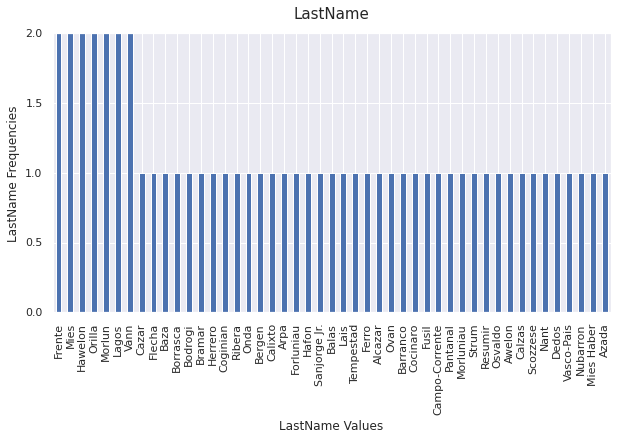

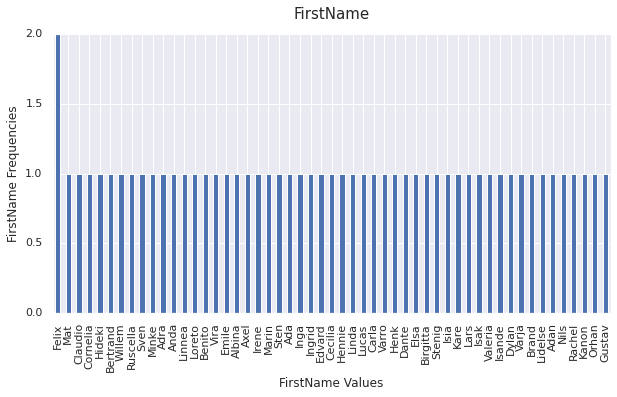

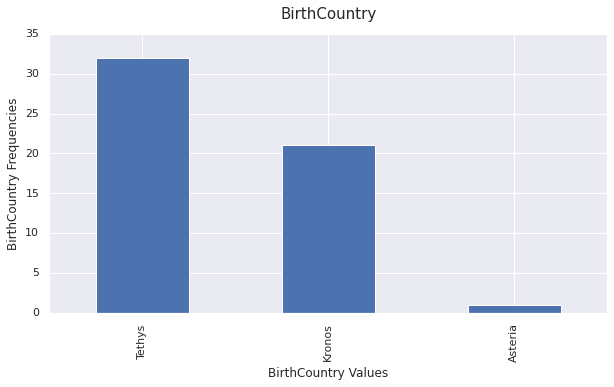

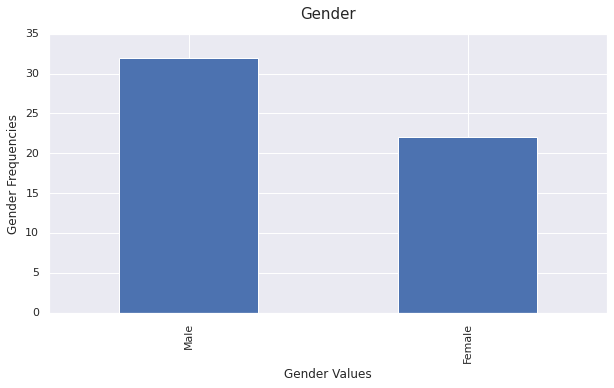

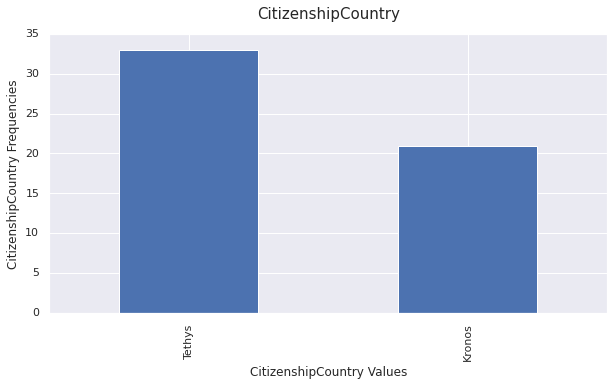

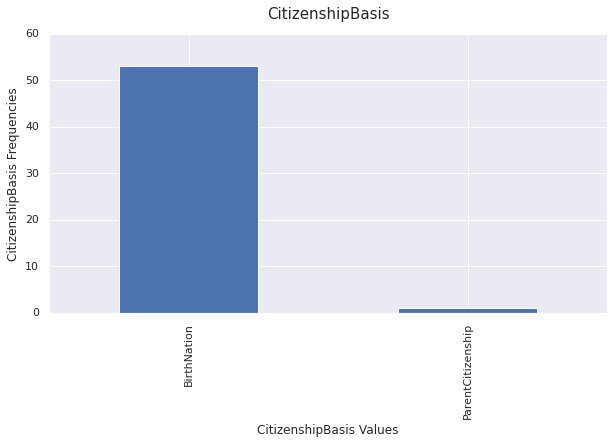

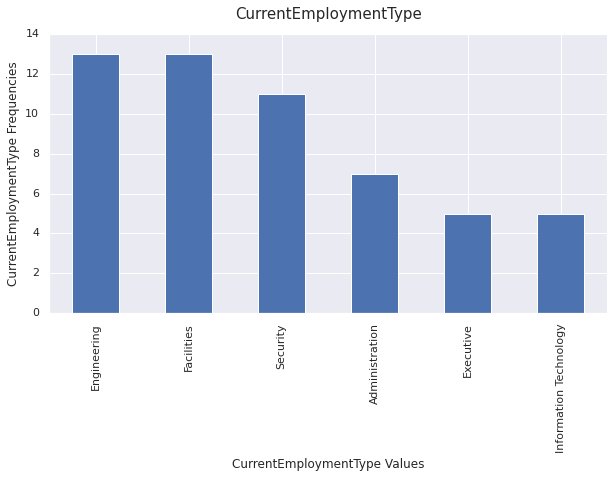

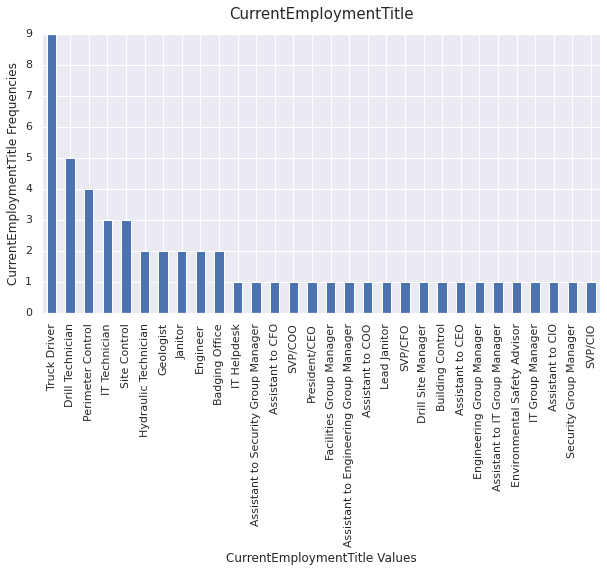

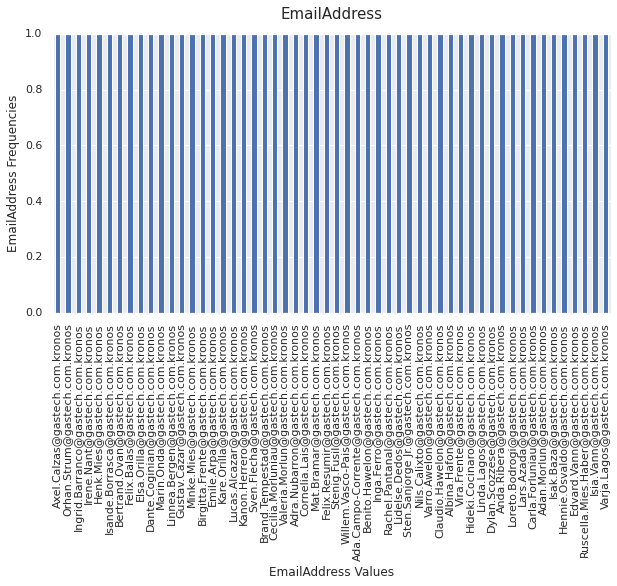

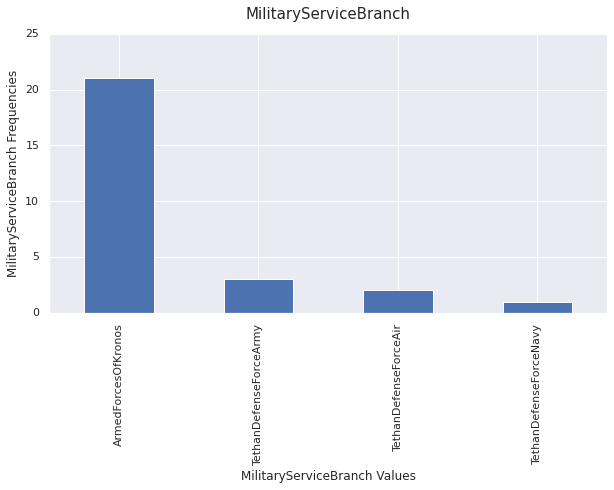

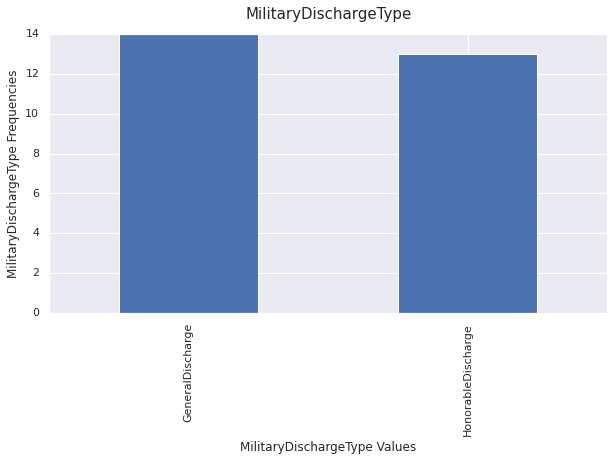

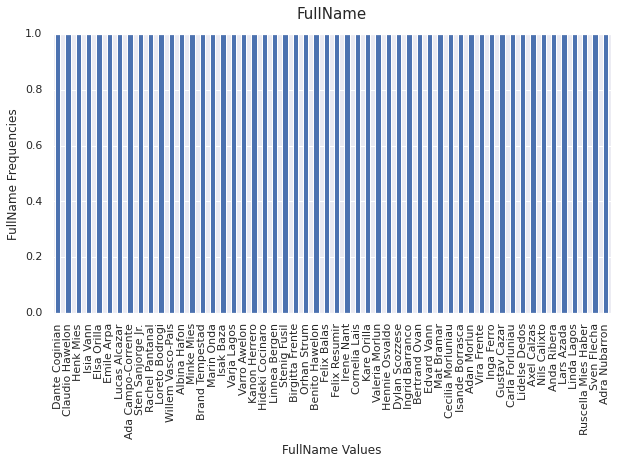

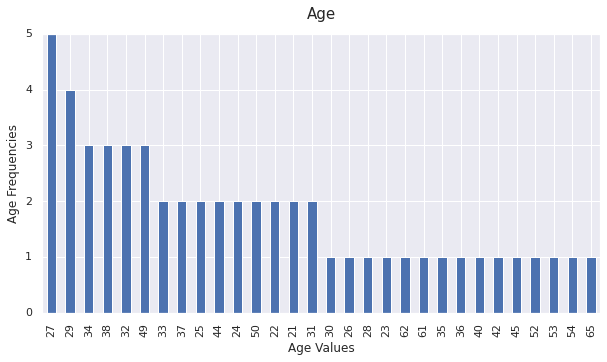

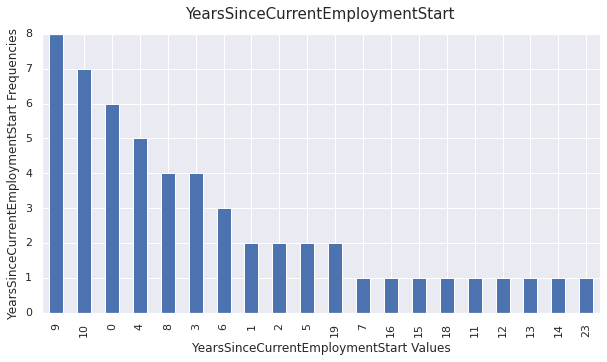

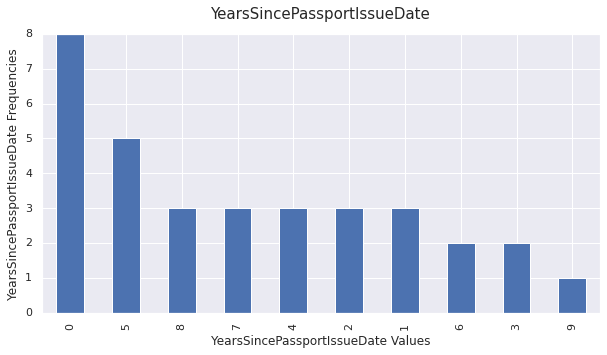

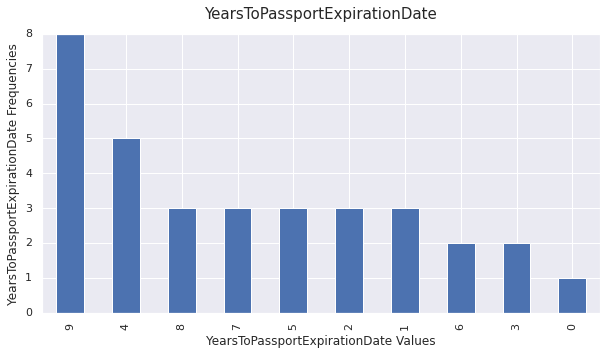

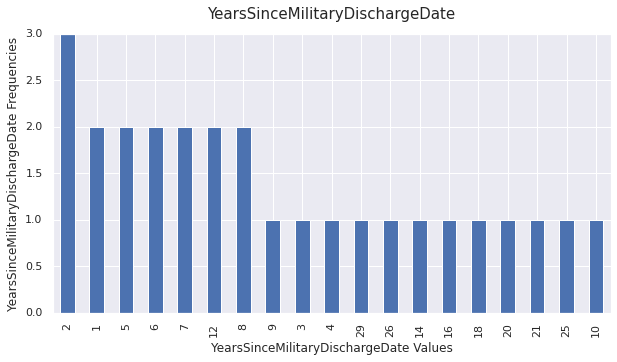

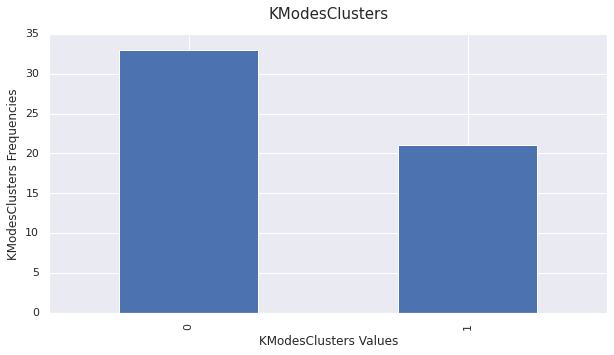

In [41]:
brachart(df_employee, df_employee.columns, size=(10, 5))

## file exoprt

In [22]:
df_employee.to_json("employee.json")

# Emails

In [48]:
df_emails = pd.read_csv("data/email headers.csv", encoding='cp1252')

In [49]:
df_emails = df_emails.drop_duplicates()
df_emails

,From,To,Date,Subject
0,Sven.Flecha@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 8:39,GT-SeismicProcessorPro Bug Report
1,Kanon.Herrero@gastech.com.kronos,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",1/6/2014 8:58,Inspection request for site
2,Bertrand.Ovan@gastech.com.kronos,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",1/6/2014 9:28,New refueling policies - Effective February 1
3,Valeria.Morlun@gastech.com.kronos,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",1/6/2014 9:38,Route suggestion for next shift
4,Mat.Bramar@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",1/6/2014 9:49,Upcoming birthdays
...,...,...,...,...
1165,Mat.Bramar@gastech.com.kronos,"Mat.Bramar@gastech.com.kronos, Anda.Ribera@gas...",1/17/2014 19:47,RE: Training opportunity
1166,Sven.Flecha@gastech.com.kronos,"Nils.Calixto@gastech.com.kronos, Sven.Flecha@g...",1/17/2014 19:56,RE: The most creative spam I've seen lately.
1167,Dylan.Scozzese@gastech.com.kronos,"Albina.Hafon@gastech.com.kronos, Valeria.Morlu...",1/17/2014 20:04,RE: Traffic advisory for today
1168,Varja.Lagos@gastech.com.kronos,"Hideki.Cocinaro@gastech.com.kronos, Varja.Lago...",1/17/2014 20:15,RE: Inspection request for site


In [50]:
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1169
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   From     1169 non-null   object
 1   To       1169 non-null   object
 2   Date     1169 non-null   object
 3   Subject  1169 non-null   object
dtypes: object(4)
memory usage: 45.7+ KB


In [51]:
df_emails.isna().sum()

From       0
To         0
Date       0
Subject    0
dtype: int64

In [52]:
re.sub("\ARE: ", "", "RE: Traffic advisory for today")

'Traffic advisory for today'

In [53]:
df_emails.Subject = df_emails.Subject.apply(lambda s: re.sub("\ARE: ", "", s))

In [54]:
df_emails.nunique()

From         55
To          238
Date       1064
Subject     157
dtype: int64

In [55]:
for email in set(df_emails.From):
    if email not in set(df_employee.EmailAddress):
        print(email)

Sten.Sanjorge Jr.@gastech.com.tethys


In [56]:
df_emails.From.loc[df_emails.From == "Sten.Sanjorge Jr.@gastech.com.tethys"] = "Sten.Sanjorge Jr.@gastech.com.kronos"

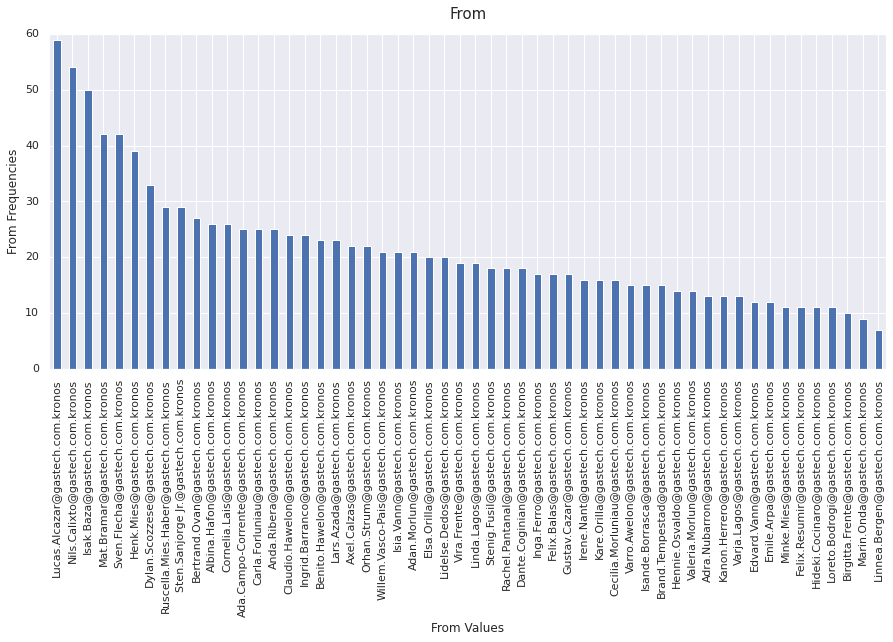

In [44]:
brachart(df_emails, ["From"], size=(15, 6))

In [57]:
df_emails = df_emails.merge(df_employee, left_on='From', right_on='EmailAddress')[["Date", "FullName", "From", "To", "Subject"]]
df_emails

,Date,FullName,From,To,Subject
0,1/6/2014 8:39,Sven Flecha,Sven.Flecha@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",GT-SeismicProcessorPro Bug Report
1,1/6/2014 15:11,Sven Flecha,Sven.Flecha@gastech.com.kronos,"Nils.Calixto@gastech.com.kronos, Sven.Flecha@g...",GT-SeismicProcessorPro Bug Report
2,1/7/2014 10:34,Sven Flecha,Sven.Flecha@gastech.com.kronos,"Sven.Flecha@gastech.com.kronos, Lucas.Alcazar@...",GT-SeismicProcessorPro Bug Report
3,1/7/2014 11:05,Sven Flecha,Sven.Flecha@gastech.com.kronos,"Sven.Flecha@gastech.com.kronos, Lucas.Alcazar@...",GT-SeismicProcessorPro Bug Report
4,1/8/2014 8:49,Sven Flecha,Sven.Flecha@gastech.com.kronos,"Sven.Flecha@gastech.com.kronos, Isak.Baza@gast...",Staff still leaving computers unlocked when th...
...,...,...,...,...,...
1164,1/14/2014 19:25,Minke Mies,Minke.Mies@gastech.com.kronos,"Inga.Ferro@gastech.com.kronos, Loreto.Bodrogi@...",Action: Virus detected on your system
1165,1/15/2014 15:33,Minke Mies,Minke.Mies@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",Employee of the month
1166,1/17/2014 10:59,Minke Mies,Minke.Mies@gastech.com.kronos,Vira.Frente@gastech.com.kronos,The rest of the files are in your mailbox
1167,1/17/2014 12:46,Minke Mies,Minke.Mies@gastech.com.kronos,Vira.Frente@gastech.com.kronos,The rest of the files are in your mailbox


In [58]:
df_emails.to_json("emails.json")

## Emails Network

In [59]:
nodes = pd.DataFrame(sorted(df_employee.FullName), columns=["Id"])
nodes

,Id
0,Ada Campo-Corrente
1,Adan Morlun
2,Adra Nubarron
3,Albina Hafon
4,Anda Ribera
5,Axel Calzas
6,Benito Hawelon
7,Bertrand Ovan
8,Birgitta Frente
9,Brand Tempestad


In [60]:
nodes.to_json("nodes.json")

In [ ]:
# archi con FullName

In [3]:
df = pd.read_csv("edges.csv")
df

,Unnamed: 0,Source,Target
0,0,Sven Flecha,Isak Baza
1,1,Sven Flecha,Lucas Alcazar
2,2,Kanon Herrero,Felix Resumir
3,3,Kanon Herrero,Hideki Cocinaro
4,4,Kanon Herrero,Inga Ferro
...,...,...,...
2030,2030,Dylan Scozzese,Cornelia Lais
2031,2031,Dylan Scozzese,Ruscella Mies Haber
2032,2032,Dylan Scozzese,Anda Ribera
2033,2033,Henk Mies,Edvard Vann
